In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Alex\AppData\Local\Temp\ipykernel_12624\1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
from sklearn import datasets

# загрузка датасета
iris = datasets.load_iris()

In [7]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
data = pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width':iris.data[:,1],
    'petal_length':iris.data[:,2],
    'petal_width':iris.data[:,3],
    'species':iris.target
})

In [18]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
from sklearn.model_selection import train_test_split

X = data[['sepal_length','sepal_width','petal_length','petal_width']]
y = data['species']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=85)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [26]:
clf.predict([[0,5,5,8]])

a:\anaconda3\envs\RF\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [28]:
#поиск важных компонентов при помощи sklearn

from sklearn.ensemble import RandomForestClassifier
import pandas as pandas

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.474609
petal length (cm)    0.404872
sepal length (cm)    0.083999
sepal width (cm)     0.036520
dtype: float64

C:\Users\Alex\AppData\Local\Temp\ipykernel_12624\2212549181.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')


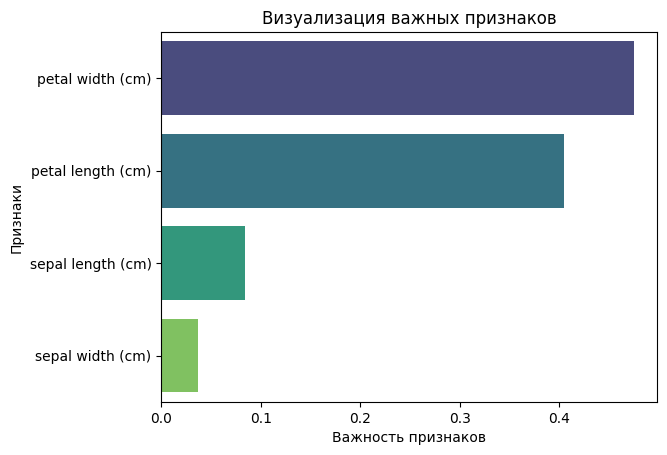

In [30]:
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

In [33]:
# повторная генерация модели с отобранными признаками

X = data[['petal_width','petal_length','sepal_length']]
y = data['species']

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.7,random_state=85 )

In [34]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9619047619047619
